## Loan Approval Case study


In [76]:
!gdown 1N-c4cTM4TotDQZWTOB9mHjrojD7iaWOX

Downloading...
From: https://drive.google.com/uc?id=1N-c4cTM4TotDQZWTOB9mHjrojD7iaWOX
To: /content/loan.csv
100% 38.0k/38.0k [00:00<00:00, 63.2MB/s]


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,norm,ttest_ind,chi2_contingency,shapiro,kstest
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df=pd.read_csv('loan.csv')

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Basic Exploration


In [ ]:
df.info()
#dependents should ideally be an number it should not be an object
#remember NAN is a floating point number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Dependents'].value_counts()
#becuase of 3+ row value our dependents column is converted as object

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df.describe()
#describes the numerical data
#look at the Credit history column mean values
#we can infer 84% of people have credit history
#when ever we find a column with 1 and 0 then the describe function gives mean values of ones

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isna().sum()/df.shape[0]*100
#it gives the percentage of null values in a column

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
# While dealing with data like this consisting of Almost equal number of
#Categorical and numerical columns
#we try to segregate them and then deal with them individually
cat_cols=df.dtypes=='object'
cat_cols=list(cat_cols[cat_cols].index)
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
#we dont need to deal with Loan Status because its our target element
cat_cols.remove('Loan_Status')

In [ ]:
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

### Univariate Analysis

In [ ]:
#Target variable
#Loan Statsus

<Axes: xlabel='Loan_Status', ylabel='count'>

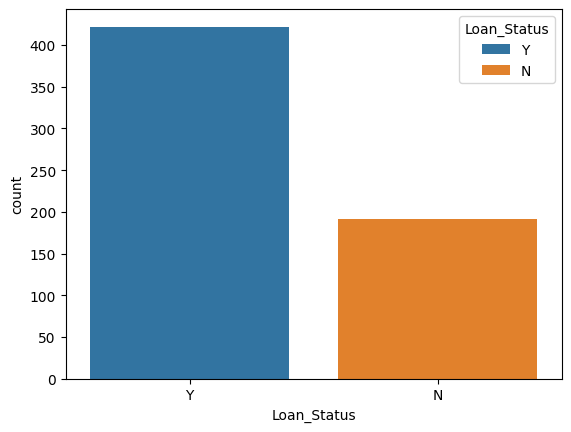

In [ ]:
sns.countplot(data=df,x='Loan_Status',hue='Loan_Status',dodge=False)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

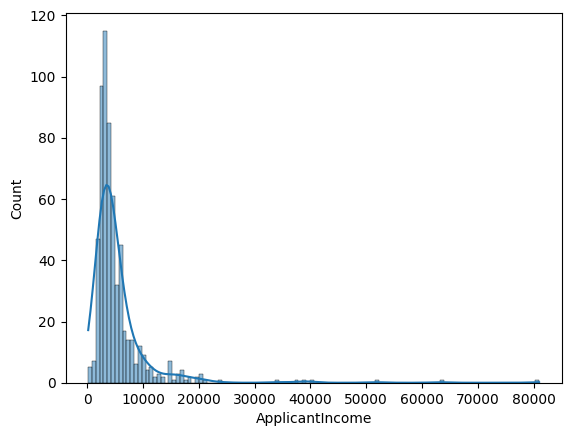

In [ ]:
#Drawing a histogram to understand the distribution of applicant income
sns.histplot(data=df,x='ApplicantIncome',kde=True)
# we can infer the applicants with income range 0 to 20000 dollars are more in the list of loan applicants

#### the above distribution looks like **lognormal distribution** which skewed to the right side meaning that distribution  has long tail towards the right

<Axes: xlabel='ApplicantIncome'>

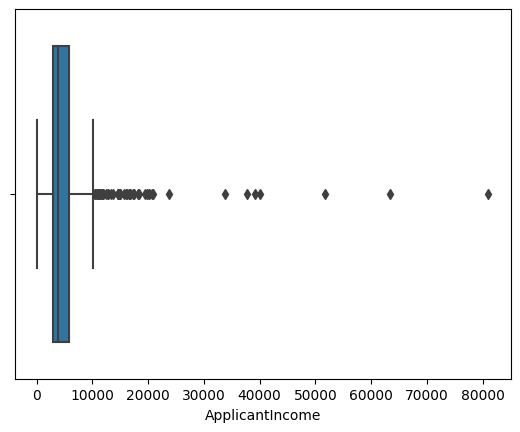

In [ ]:
#lets create box to have understanding of medians and quartiles
sns.boxplot(data=df,x='ApplicantIncome')
#we can observe median at around 5000 and outliers are there beyond 10000

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

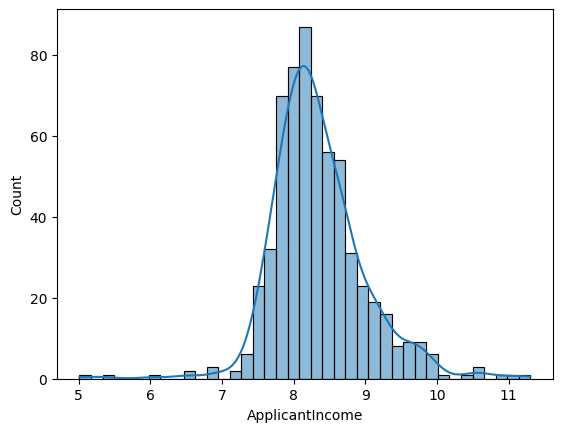

In [ ]:
#how do we confirm that the distribution is lognormal distribution
#lets apply log of the applicant income and see how the distribution looks like
sns.histplot(x=np.log(df['ApplicantIncome']),kde=True)
#we can see that this is some sort of normal districution but we are not sure
#so lets test the normality of the distribution
#to do so we use wilken shapiro test or qq plot or kstest

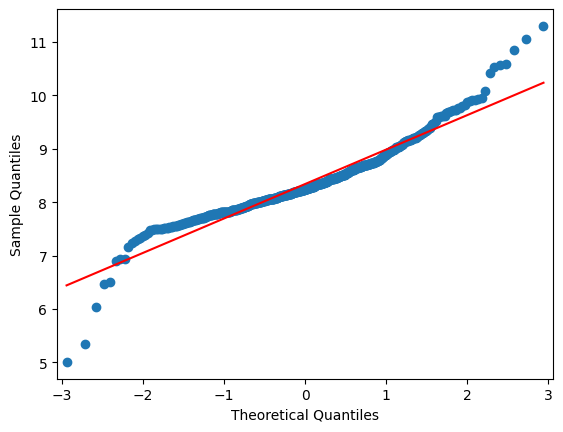

In [ ]:
qqplot(np.log(df['ApplicantIncome']),line='s')
plt.show()
# we can see few points are here and there and they are not lying on the standard line


In [ ]:
#Using Shapiro test
#H0:distribution is normal
#Ha: distribution is not normal
s_stattistic,p_value=shapiro(np.log(df['ApplicantIncome']))
if p_value<0.05:
  print('Reject H0: distribution is not normal')
else:
  print('Fail to reject H0')

Reject H0: distribution is not normal


In [ ]:
#KS Test (Kolmogrow smirnnov test)
#Ks test is performed in multiple situations
# imagine 2 distributions one is wider and one narrower but their means are almost near to each other
#if we perform ttest independent it results in to we will fail to reject H0
#becuase the means are similar
#ttest will gives us wrong result in such situation
#what KS test does is it compares the CDF's of both the distributions
#if the CDF's are similar we accept that both distributions same
#KS test compares the difference between CDF values
# if we want to check one distribution is similar to other distribution we use KS tes

In [ ]:
#H0: the distribution is Gaussian
#Ha: the distribution is not Gaussian

In [ ]:
#inorder to compare the CDF's of two distributions we need to have values in the format of normality
log_appl_income=np.log(df['ApplicantIncome'])
#to standardize the value use (x-mean/std) fromula
Z_appl_income=(log_appl_income-log_appl_income.mean())/(log_appl_income.std())
kstest(Z_appl_income,norm.cdf)

KstestResult(statistic=0.08360472600316649, pvalue=0.0003504196051879084, statistic_location=0.19584194038098854, statistic_sign=1)

In [ ]:
pvalue=0.000350
if p_value<0.05:
  print('Reject H0: distribution is not normal')
else:
  print('Fail to reject H0')

Reject H0: distribution is not normal


### we checked with 3 tests **qqplot**,**shapiro test**(for normality check),**KS test**(where we can compare with any 2 distributions) from these three   tests it is concluded that the distribution of Applicants income is not lognormally distributed. its just random distribution


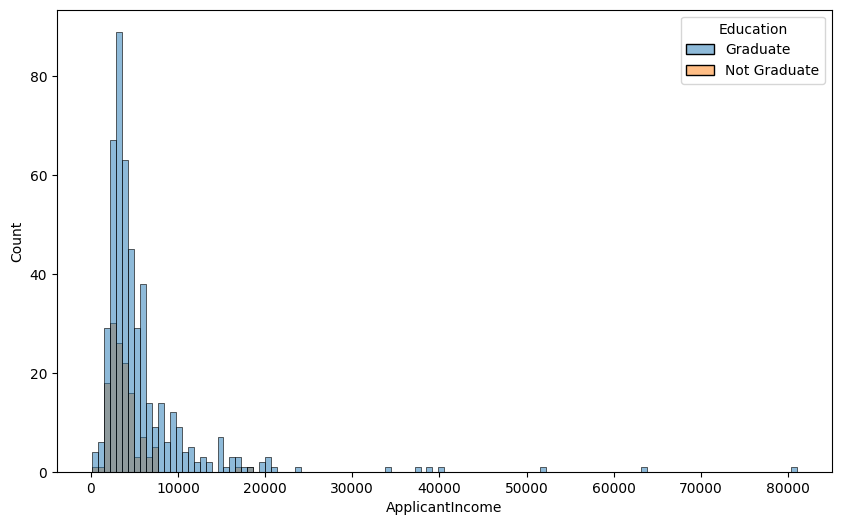

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='ApplicantIncome',hue='Education')
plt.show()

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

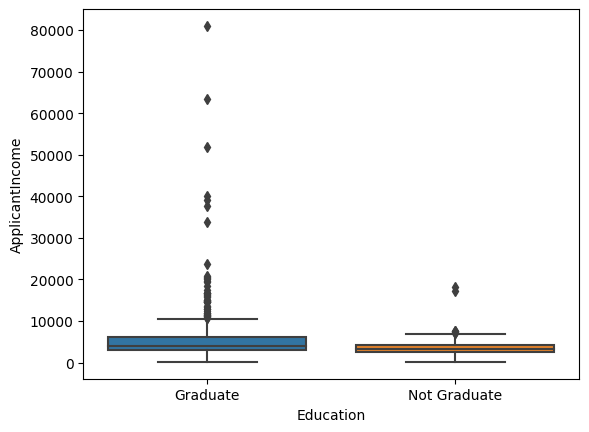

In [ ]:
sns.boxplot(data=df,y='ApplicantIncome',x='Education')

In [ ]:
df.groupby(['Loan_Status']).mean()
#look ar credit_history column : says out of all the people who got denied loan 54% had credut history
#out of all the people who got the loan 98%b had credit history


<ipython-input-41-ffc4493d74ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Loan_Status']).mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [ ]:
df_acc=df[df['Loan_Status']=='Y']['ApplicantIncome']
df_rej=df[df['Loan_Status']=='N']['ApplicantIncome']

In [ ]:
df_acc.mean()

5384.068720379147

In [ ]:
df_rej.mean()

5446.078125

In [ ]:
#H0:incomes have no affect on the loan applcation status
#Ha:incomes have no affect on the loan applcation status
 #muacc>mu_rej
ttest_ind(df_acc,df_rej,alternative="greater")
#greater means people whose application got accepted, their mean income is higher
# than the people whose application got rejected

TtestResult(statistic=-0.010742640064483321, pvalue=0.5042830665576362, df=421.0)

In [ ]:
p_value=0.50428
if p_value<0.05:
  print('Reject H0: distribution is not normal')
else:
  print('Fail to reject H0: incomes have no effect on the loan status')

Fail to reject H0


In [ ]:
#mu_acc<mu_rej
ttest_ind(df_acc,df_rej,alternative="less")

TtestResult(statistic=-0.010742640064483321, pvalue=0.4957169334423638, df=421.0)

In [ ]:
p_value=0.49571
if p_value<0.05:
  print('Reject H0: distribution is not normal')
else:
  print('Fail to reject H0: incomes have no effect on the loan status')

Fail to reject H0: incomes have no effect on the loan status


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

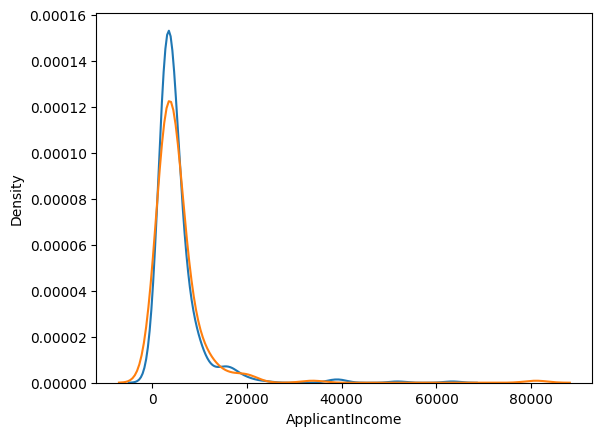

In [ ]:
#using ttest we proved means are same
#can we also check if their distributions are same or not?
sns.kdeplot(df_acc)
sns.kdeplot(df_rej)
#the distributions are also fairly similar verify using KStest

In [ ]:
kstest(df_acc,df_rej)

KstestResult(statistic=0.04393759873617693, pvalue=0.9480203334325082, statistic_location=3333, statistic_sign=1)

In [79]:
p_value=0.948
if p_value<0.05:
  print('Reject H0: distributions are same')
else:
  print('Fail to reject H0')

Fail to reject H0


### the above steps conculde that there is no relation between applicant income on loan aplication getting accepted or rejected
### so applicant income is not at affecting the loan status

## Binning the income

In [80]:
bins=[0,2500,4000,6000,8000,10000,81000]
lables =['low','Average','medium','h1','h2','Very high']
df['IncomeBin']=pd.cut(df['ApplicantIncome'],bins=bins,labels=lables)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,h1


In [84]:
#we took applicant income (numerical column) to understand the affect of income on application status
#lets work on categorical column
pd.crosstab(df['IncomeBin'],df['Loan_Status'])

Loan_Status,N,Y
IncomeBin,,
low,34,74
Average,67,159
medium,45,98
h1,20,34
h2,9,22
Very high,17,35


In [82]:
#H0: both the categorical values (income bin and loan status) are independent
#Ha: they are dependent
chi2_contingency(pd.crosstab(df['IncomeBin'],df['Loan_Status']))

Chi2ContingencyResult(statistic=1.2390175474316056, pvalue=0.941079844721327, dof=5, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 16.26058632,  35.73941368]]))

In [83]:
p_value=0.94107
if p_value<0.05:
  print('Reject H0:')
else:
  print('Fail to reject H0')

Fail to reject H0


### we conclude there is no corelation between income and loan application

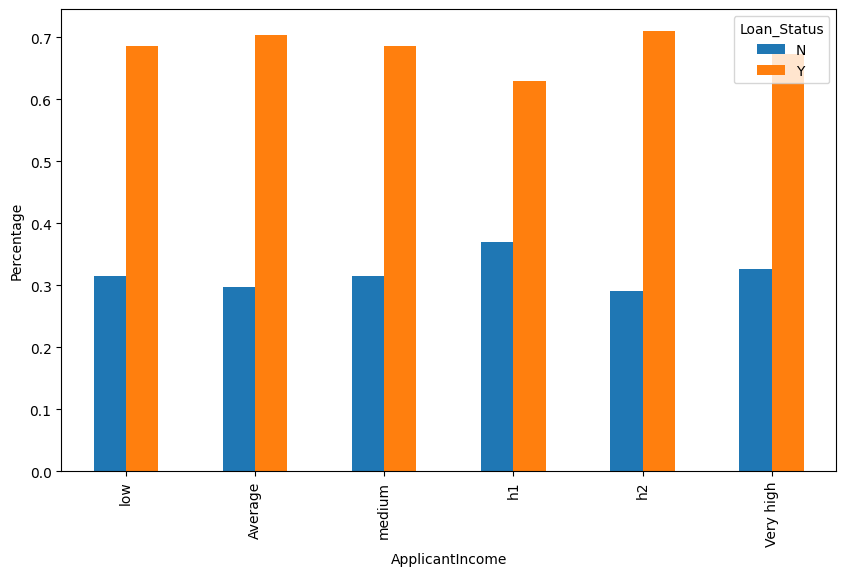

In [86]:
income_bin=pd.crosstab(df['IncomeBin'],df['Loan_Status'])
income_bin.div(income_bin.sum(axis=1),axis=0).plot(kind='bar',figsize=(10,6))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

### above bar plot says that there is no abnormality in the pattern of application being accepted or rejected,we conclude the applicant income is indepent of loan applcation being accepted or rejected